# First pass analysis of line/loop data

<ul>
    <li> Analyse correct sequence lengths. </li>
    <li> Do reaction times </li>
    <li> Analyse as a function of distance from reward </li>
    <li> Try to fit RL model to these data </li> 
    
</ul>

<b> WHY IS THERE A DIFFERENCE BETWEEN REW_LIST AND DAT_DICT['STATE'] </b>

In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import scipy.stats as stt
seaborn.set(font_scale=1.5,style='ticks')
import os
import re
import sys
import itertools
import networkx as nx
sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")


sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master")
sys.path.append(r"C:\Users\yweissenberger\Documents\code\line_loop-master\packages")


In [6]:
import mouse_poker as mpk

# Defined functions 

In [7]:
poke_pos = [ [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]

In [8]:
def get_poke_to_state_map(lines):
    """ """
    tmp = []
    for i,j in zip([int(re.findall('POKEDPORT_([0-9])',i)[0]) for i in lines if '_POKEDPORT' in i],
                         [int(re.findall('POKEDSTATE_([0-9])',i)[0]) for i in lines if '_POKEDSTATE' in i]):

        if [i,j] not in tmp:
            tmp.append([i,j])
    poke_to_state_map = [i[1] for i in sorted(tmp)]
    return poke_to_state_map,tmp

In [24]:
def get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=5):
    
    """ Checked the reward locations """
    #aa = [int(re.findall('POKEDSTATE_([0-9])',lines[ijk-1])[0]) for ijk,i in enumerate(lines) if 'REW_True' in i]
    perf = np.zeros([9,4])
    perf_ctr = np.zeros([9,4])
    rew_hist = []
    for i,j in enumerate([poke_to_state_map[i] for i in rew_indices]):
        perf[j,i] = np.nan
    for rew_ctr,(st,nd) in enumerate(zip(np.where(dat_dict['rew_list'])[0][:-1],np.where(dat_dict['rew_list'])[0][1:])):
        #print(st,nd)
        rew_loc = poke_to_state_map[dat_dict['rews'][rew_ctr][0]]
        c_rew_index = rew_indices.index(dat_dict['rews'][rew_ctr][0])
        rew_hist.append(c_rew_index)
        
        
        seq_rews = 1
        for rlP in rew_hist[::-1]:
            if rlP==c_rew_index:
                seq_rews += 1
            else:
                break
        if (all([c_rew_index==i for i in rew_hist[-minNrew:]]) and len(rew_hist)>minNrew):
            
            #print(seq_rews)
            has_visited = []
            for pk_ctr in range(st,nd):
                if (len(dat_dict['state'][pk_ctr][1])>1):# or (dat_dict['state'][pk_ctr][0]==0 or dat_dict['state'][pk_ctr][0]==8):
                    d0 = np.abs(dat_dict['state'][pk_ctr][0]-rew_loc)
                    d1 = np.abs(dat_dict['state'][pk_ctr+1][0]-rew_loc)
                    st_dist = dat_dict['state'][pk_ctr][0]-dat_dict['state'][pk_ctr+1][0]
                    if dat_dict['rew_list'][pk_ctr]:
                        st_dist = 99
                    
                    state = dat_dict['state'][pk_ctr][0]
                    if state not in has_visited:
                        rewarded = dat_dict['rew_list'][pk_ctr+1]
                        if rewarded:
                            perf[state,c_rew_index] += 1
                            perf_ctr[state,c_rew_index] += 1

                        elif d1<d0:
                            perf[state,c_rew_index] += 1
                            perf_ctr[state,c_rew_index] += 1
                        else:
                            perf[state,c_rew_index] += 0
                            perf_ctr[state,c_rew_index] += 1
                        has_visited.append(state)
    return perf,perf_ctr

In [25]:
#aa = [int(re.findall('POKEDSTATE_([0-9])',lines[ijk-1])[0]) for ijk,i in enumerate(lines) if 'REW_True' in i]

In [26]:
#poke_to_state_map

# Actual code to run stuff 

In [27]:
#print(day_df['filepath'].values[ix])
f = open("/Users/yweissenberger/Documents/Pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-03-03-105842.txt",'r')
#f = open("/Volumes/hpc_dat/pycontrol/data/line_loop_batch_4_RUNNAVI/'456675_3'-2021-02-12-121633.txt",'r')
#f = open("/Users/yves/Documents/beh_dat_new_room/'456675_10'-2021-02-17-110616.txt",'r')

lines =f.readlines()
experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)


In [28]:
poke_to_state_map,_ = get_poke_to_state_map(lines)
rew_indices = [0,3,5,8]
rew_indices = [eval(re.findall('REWARD LOCATIONS(\[.*\])',l)[0]) for l in lines if re.findall('REWARD LOCATIONS(\[.*\])',l)][0]


In [29]:
poke_to_state_map

[5, 2, 0, 3, 4, 7, 6, 8, 1]

In [30]:
perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=20)
fc = perf/perf_ctr
#fc[np.isnan(fc)] = 1
print(np.nanmean(fc))

0.9010253635253636


<ipython-input-30-3e7e745567a5>:2: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


In [31]:
#perf[np.where(perf_ctr==0)[0],np.where(perf_ctr==0)[1],np.where(perf_ctr==0)[2]] = np.nan

In [32]:
#plt.plot(gaussian_filter1d(np.nanmean(perf/perf_ctr,axis=(0,1)),2,mode='nearest'))

In [33]:
edges_state = [[i,i+1] for i in range(8)]
edges_state.extend([i+1,i] for i in range(8))    
edges = []
for e1,e2 in edges_state:
    edges.append([poke_to_state_map.index(e1),poke_to_state_map.index(e2)])

In [34]:
ix = 1
c_rew_index = poke_to_state_map[rew_indices[ix]]

good_edges = [[poke_to_state_map.index(0),poke_to_state_map.index(1)],
              [poke_to_state_map.index(8),poke_to_state_map.index(7)]]
bad_edges = []
for s in range(1,8):
    if s!=c_rew_index:
        d1 = np.abs(c_rew_index-(s+1))
        d2 = np.abs(c_rew_index-(s-1))
        min_ = np.argmin([d1,d2])
        max_ = np.argmax([d1,d2])

        good_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][min_])])
        bad_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][max_])])

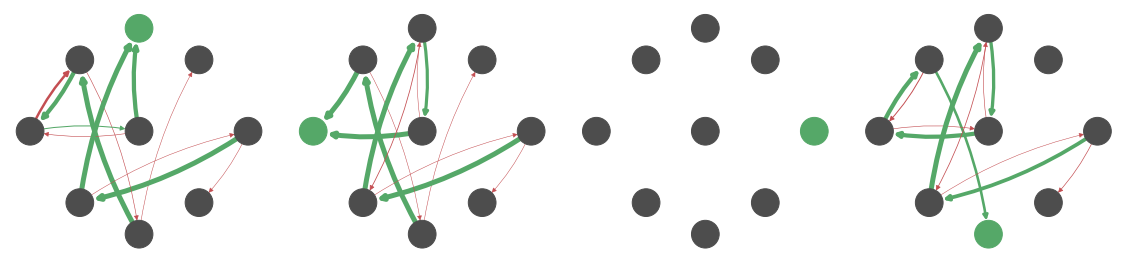

In [35]:
plt.figure(figsize=(16,4))
for ix in range(4):
    plt.subplot(1,4,ix+1)
    #ix = 1
    c_rew_index = poke_to_state_map[rew_indices[ix]]

    good_edges = [[poke_to_state_map.index(0),poke_to_state_map.index(1)],
                  [poke_to_state_map.index(8),poke_to_state_map.index(7)]]
    bad_edges = []
    for s in range(1,8):
        if s!=c_rew_index:
            d1 = np.abs(c_rew_index-(s+1))
            d2 = np.abs(c_rew_index-(s-1))
            min_ = np.argmin([d1,d2])
            max_ = np.argmax([d1,d2])

            good_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][min_])])
            bad_edges.append([poke_to_state_map.index(s),poke_to_state_map.index([s+1,s-1][max_])])




    pos = np.array([1,-1])*poke_pos
    G0 = nx.DiGraph()
    G0.add_nodes_from(range(9),pos=np.array([1,-1])*poke_pos)
    nx.draw(G0,pos=pos,alpha=.2)
    G = nx.DiGraph()
    weights = []

    for e in good_edges:
        G.add_edge(e[0],e[1],weight=fc[poke_to_state_map[e[0]],ix],color='g')
        #weights.append(3*fc[poke_to_state_map[e[0]],ix])

    for e in bad_edges:
        G.add_edge(e[0],e[1],weight=1-fc[poke_to_state_map[e[0]],ix],color='r')
        #weights.append(3*fc[poke_to_state_map[e[0]],ix])

    #G.add_edges_from([i for i in good_edges if None not in i])
    weights = nx.get_edge_attributes(G,'weight')
    colors = nx.get_edge_attributes(G,'color')
    node_colors = ['.3' for _ in range(9)]
    node_colors[[7,5,3,1][ix]] = 'g'
    nx.draw(G,
        pos=pos,
            width=(10**(np.array(list(weights.values()))))/2,
            edge_color=np.array(list(colors.values())),
            connectionstyle="arc3,rad=-0.1",
            node_color=node_colors,
            node_size=768)
plt.tight_layout()
#plt.savefig("/Users/yves/Desktop/tpf/navi_decisions.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_decisions.png",dpi=300)


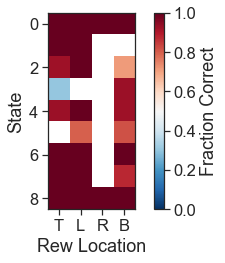

In [36]:
sqr = fc
sqr[0] = 1
sqr[-1] = 1
plt.imshow(sqr,vmin=0,vmax=1,cmap='RdBu_r')
plt.xlabel("Rew Location")
plt.xticks([0,1,2,3],['T','L','R','B'])
plt.ylabel("State")
cbar = plt.colorbar()
cbar.set_label("Fraction Correct")
plt.tight_layout()

In [22]:
fc = perf/perf_ctr
fc[np.isnan(fc)] = 1

<ipython-input-22-52fb409a140d>:1: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


In [23]:
fc

array([[1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [0.96      , 0.86666667, 1.        , 0.69565217],
       [0.53846154, 1.        , 1.        , 0.90909091],
       [0.93333333, 1.        , 1.        , 0.875     ],
       [1.        , 0.83333333, 1.        , 0.8       ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.88888889],
       [1.        , 1.        , 1.        , 1.        ]])

# Performance history

In [66]:
ROOT = "/Users/yweissenberger/Documents/Pycontrol/data/line_loop_batch_4_RUNNAVI/"#/Users/yves/Documents/behavior_data/line_loop_cohort_1/line_loop_batch_4_RUNNAVI/'
fs = sorted([os.path.join(ROOT,i) for i in os.listdir(ROOT) if '.txt' in i])
perf_hist = []
all_fc  = []
all_perf = np.zeros([9,4])
all_ctr = np.zeros([9,4])
for f_ in fs[:-1]:
    try:
        f = open(f_,'r')
        lines =f.readlines()
        experiment_name, task_name, subject_id, task_nr, graph,lineloop,date,test,_ = mpk.load.get_metadata(lines)
        dat_dict,events,event_times,nRews,_ = mpk.load.parse_data(lines,experiment_name)

        #poke_to_state_map = get_poke_to_state_map(lines)
        rew_indices = [0,3,5,8]
        perf,perf_ctr = get_performance(dat_dict,poke_to_state_map,rew_indices,lines,minNrew=20)

        fc = perf/perf_ctr
        all_perf += perf
        all_ctr += perf_ctr
        all_fc.append(fc)
        perf_hist.append(np.nanmean(fc))
    except:
        pass

<ipython-input-66-7fd4eac7e435>:18: RuntimeWarning: invalid value encountered in true_divide
  fc = perf/perf_ctr


In [67]:
all_perf/all_ctr

<ipython-input-67-b6312f3beb51>:1: RuntimeWarning: invalid value encountered in true_divide
  all_perf/all_ctr


array([[       nan,        nan,        nan,        nan],
       [0.8125    , 0.96774194, 0.64285714,        nan],
       [0.84482759, 0.86153846, 0.67391304, 0.8255814 ],
       [0.56896552,        nan, 0.69230769, 0.67708333],
       [0.90909091, 0.79411765, 0.703125  , 0.7628866 ],
       [       nan, 0.81428571, 0.65517241, 0.81690141],
       [0.8125    , 0.9       , 0.77358491, 0.79166667],
       [0.91666667, 0.89655172,        nan, 0.67567568],
       [       nan,        nan,        nan,        nan]])

In [68]:
stt.binom_test(0.57*400,n=400)

0.00796983057579857

In [69]:
fc

array([[       nan,        nan,        nan,        nan],
       [0.83333333, 0.92857143, 1.        ,        nan],
       [0.83333333, 0.81481481, 0.88888889, 0.9375    ],
       [0.53846154,        nan, 0.61538462, 0.8       ],
       [0.92857143, 0.83333333, 0.64705882, 0.9       ],
       [       nan, 0.85185185, 0.46666667, 1.        ],
       [0.66666667, 1.        , 0.77777778, 1.        ],
       [1.        , 0.9       ,        nan, 0.8       ],
       [       nan,        nan,        nan,        nan]])

In [70]:
#np.nanmean(all_fc[-5:],axis=0)

[[1.         1.         1.         1.        ]
 [0.85309524 0.98809524 0.81060606        nan]
 [0.86848485 0.87310406 0.72453704 0.83147759]
 [0.5789011         nan 0.66124897 0.74361472]
 [0.89301587 0.74820261 0.85378908 0.81253669]
 [       nan 0.89034132 0.73333333 0.90397727]
 [0.88888889 0.94117647 0.78720539 0.86234568]
 [0.96875    0.92848485        nan 0.79555556]
 [1.         1.         1.         1.        ]]


<ipython-input-71-81c2fe02d6ba>:2: RuntimeWarning: Mean of empty slice
  sqr = np.nanmean(all_fc[-10:],axis=0)


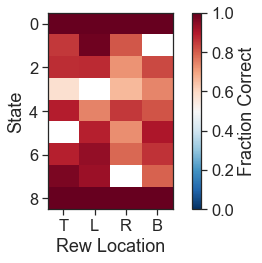

In [71]:
#sqr = all_perf/all_ctr
sqr = np.nanmean(all_fc[-10:],axis=0)
fc = sqr
sqr[0] = 1
sqr[-1] = 1
plt.imshow(sqr,vmin=0,vmax=1,cmap='RdBu_r',aspect=.7)
plt.xlabel("Rew Location")
plt.xticks([0,1,2,3],['T','L','R','B'])
plt.ylabel("State")
cbar = plt.colorbar()
cbar.set_label("Fraction Correct")
#cbar.ax.
plt.tight_layout()
#plt.tight_layout*
#plt.savefig("/Users/yves/Desktop/tpf/navi_frac_corr_by_state.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_frac_corr_by_state.png",dpi=300)
print(sqr)

In [72]:
seaborn.set(font_scale=1.5,style='ticks',rc={'axes.edgecolor': 'k',
                                             'axes.linewidth': 2,
                                             #'xtick.major.size': 6,
                                             'axes.labelcolor':'k',
                                             'xtick.major.width': 2,
                                             'ytick.major.width': 2,
                                             'xtick.major.pad': 5.5,
                                             'ytick.major.pad': 5.5,
                                             'axes.labelsize': 18
                                            })


In [73]:
from scipy.ndimage import gaussian_filter1d

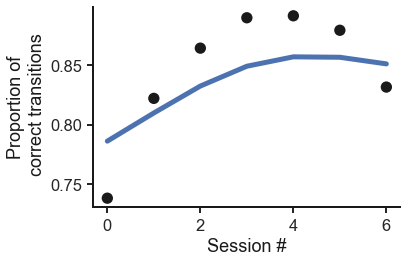

In [74]:
sess_perf = [np.nanmean(i) for i in perf_hist if not np.isnan(np.nanmean(i))][1:]
plt.plot(gaussian_filter1d(sess_perf,2.25,mode='nearest'),linewidth=5)
plt.scatter(range(len(sess_perf)),sess_perf,color='k',s=128,edgecolors='none')
plt.xlabel("Session #")
plt.ylabel("Proportion of\n correct transitions")
#plt.xlim(-.5)
seaborn.despine()
plt.tight_layout()
#plt.savefig("/Users/yves/Desktop/tpf/navi_learning.svg")
#plt.savefig("/Users/yves/Desktop/tpf/navi_learning.png",dpi=300)


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


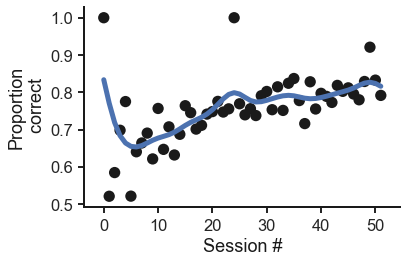

In [73]:
sess_perf = [np.nanmean(i) for i in perf_hist if not np.isnan(np.nanmean(i))][1:]
plt.plot(gaussian_filter1d(sess_perf,2.25,mode='nearest'),linewidth=5)
plt.scatter(range(len(sess_perf)),sess_perf,color='k',s=128,edgecolors='none')
plt.xlabel("Session #")
plt.ylabel("Proportion\n correct")
#plt.xlim(-.5)
seaborn.despine()
plt.tight_layout()

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


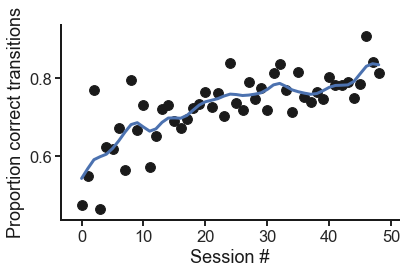

In [157]:
sess_perf = [np.nanmean(i) for i in perf_hist if not np.isnan(np.nanmean(i))][2:]
plt.plot(gaussian_filter1d(sess_perf,1.5),linewidth=3)
plt.scatter(range(len(sess_perf)),sess_perf,color='k',s=96)
plt.xlabel("Session #")
plt.ylabel("Proportion correct transitions")
seaborn.despine()
plt.tight_layout()

In [352]:
sess_perf

[0.49722222222222223,
 0.4375,
 0.575,
 0.7785714285714285,
 0.533253751851708,
 0.6662414947395835,
 0.6223282951941488,
 0.6737401169376257,
 0.5623015873015873,
 0.7999957558781088,
 0.6801653630532941,
 0.7255549534816176,
 0.6285714285714286,
 0.6530097125413526,
 0.7148889066754313,
 0.7511047675485337,
 0.6965651402837558,
 0.6748187242519604,
 0.7148784777376731,
 0.7550147542587059,
 0.737619565377113,
 0.7809430094711312,
 0.7239262720576801,
 0.7749516267766803,
 0.812864219114219,
 0.8291787702735416,
 0.7415101007090994,
 0.8239091239707511,
 0.8041840068465725,
 0.7300002479969016,
 0.8666666666666666,
 0.7148947762687461,
 0.8286583091222216,
 0.843745340022627,
 0.8108984078641084,
 0.7186338736621062,
 0.8182802374871762,
 0.768012650998762,
 0.8241828432867361,
 0.7641757529894638,
 0.7426986029797972,
 0.792046279791378,
 0.7794624634760058,
 0.7853650581919769,
 0.7923093533308587,
 0.8192483509256663,
 0.7656474722385459,
 0.9027777777777777,
 0.8608389450056116,
 